### Lab Program 1 (Chronic Disease Dataset)

- Write a python program for the chronic disease dataset and perform the following
- Analyse and preprocess the data & check if the class label is balanced or not
- To balance the class label perform oversampling of the minority class
- Check the outlier using boxplot and remove the outlier using z-score method
- Classify the chronic disease by using Logistic Regression, KNN, Random forest and Ada Boost Algorithm

## Importing Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
sns.set_theme(color_codes=True)

## Importing the dataset

In [3]:
df=pd.read_csv('new_model.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [4]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


## Visualizing the data

<AxesSubplot:xlabel='Rbc', ylabel='count'>

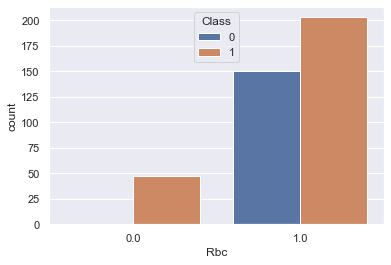

In [6]:
sns.countplot(data=df,x="Rbc",hue="Class")

<AxesSubplot:xlabel='Al', ylabel='count'>

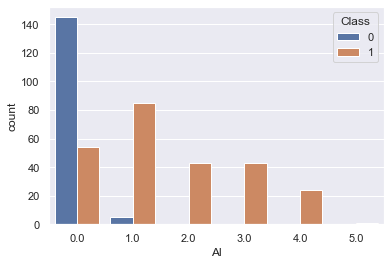

In [7]:
sns.countplot(data=df,x="Al",hue="Class")

<AxesSubplot:xlabel='Hemo', ylabel='Count'>

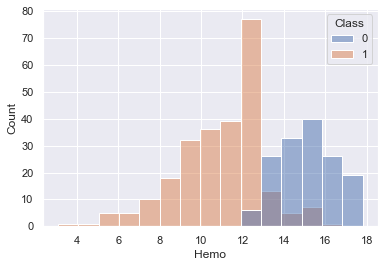

In [8]:
sns.histplot(data=df,x="Hemo",hue="Class")

<AxesSubplot:xlabel='Bp', ylabel='Count'>

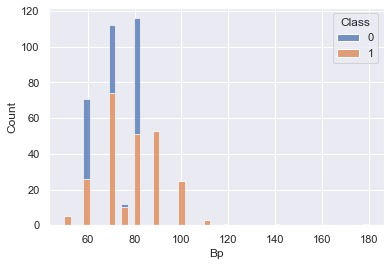

In [9]:
sns.histplot(data=df,x="Bp",hue="Class",multiple='stack')

## Preprocessing the data

In [10]:
# Checking for Nan values in the dataset
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [16]:
df_cp=df.copy(deep=True)
df_cp[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']]=df_cp[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']].replace(0,np.NaN)
df_cp.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

## Checking for balance in class

1    250
0    150
Name: Class, dtype: int64

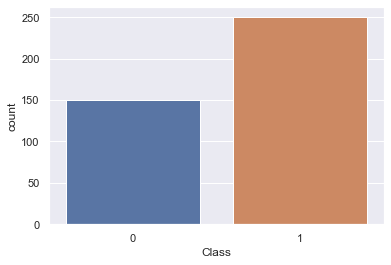

In [17]:
sns.countplot(df['Class'])
df.Class.value_counts()

- We can infer that the class is not balanced so we need to apply oversampling algorithm in order to make it balanced

## Oversampling of minority class

In [18]:
from sklearn.utils import resample

df_major= df[(df['Class']==1)]
df_minor= df[(df['Class']==0)]

df_minor_upsampled = resample(df_minor,n_samples=250,random_state=0)
df2 = pd.concat([df_minor_upsampled,df_major])

0    250
1    250
Name: Class, dtype: int64

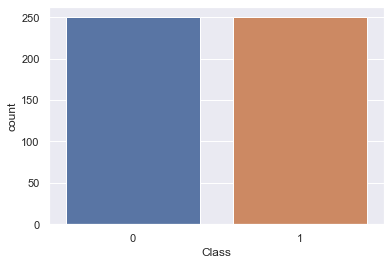

In [19]:
sns.countplot(df2['Class'])
df2.Class.value_counts()

- Now the class is balanced!

## Boxplot for determining the outliers in the dataset

<AxesSubplot:xlabel='Bp'>

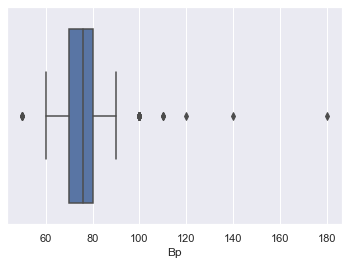

In [20]:
sns.boxplot(x=df2["Bp"])

<AxesSubplot:xlabel='Hemo'>

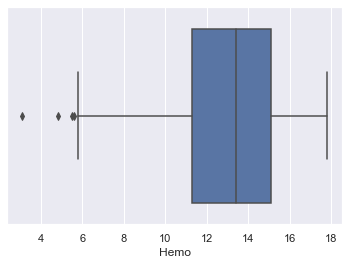

In [21]:
sns.boxplot(x=df2["Hemo"])

<AxesSubplot:xlabel='Su'>

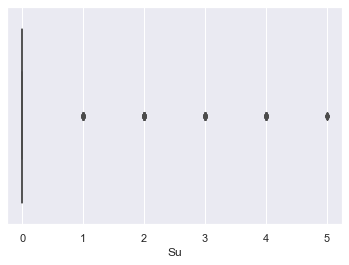

In [22]:
sns.boxplot(x=df2["Su"])

<AxesSubplot:xlabel='Al'>

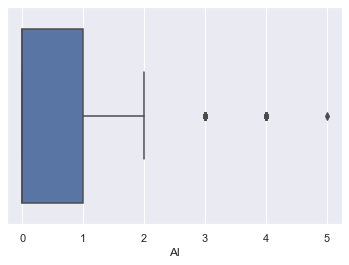

In [23]:
sns.boxplot(x=df2["Al"])

<AxesSubplot:xlabel='Rbcc'>

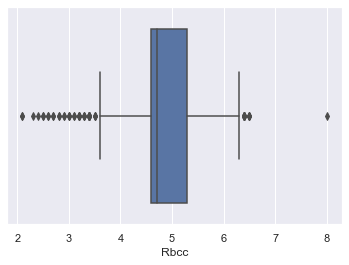

In [24]:
sns.boxplot(x=df2["Rbcc"])

## Removing the outliers by using Z-Score method

In [25]:
import scipy.stats as stats
z = np.abs(stats.zscore(df2))
data_clean = df2[(z<3).all(axis=1)]
data_clean.shape

(420, 14)

<AxesSubplot:>

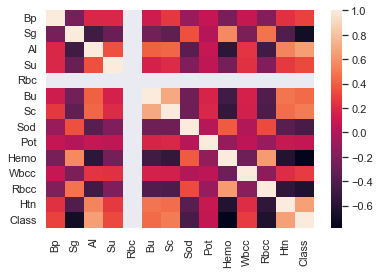

In [26]:
sns.heatmap(data_clean.corr())

- We can observe that the information for Rbc is missing so we need to drop it

## Dropping RBC Column

In [27]:
data=df.drop(columns=['Rbc'])

In [28]:
data

,Bp,Sg,Al,Su,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


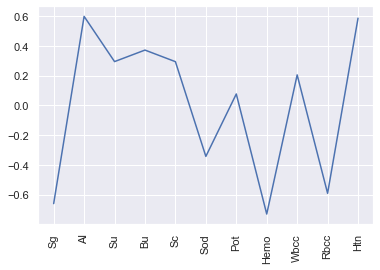

In [29]:
corr=data[data.columns[1:]].corr()['Class'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

## Training the model by using Algorithms

### 1. Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
x=data.drop('Class',axis=1)
y=data['Class']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [34]:
# Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred_logistic=model.predict(x_test)

In [36]:
y_pred_logistic

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,y_pred_logistic)*100
print(f"Accuracy of the model using Logistic Regression is is {accuracy1}% ")

Accuracy of the model using Logistic Regression is is 95.0% 


### 2. KNN Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [42]:
accuracy2=accuracy_score(y_test,y_pred_knn)*100
print(f"The accuracy of the model using KNN is {accuracy2}%")

The accuracy of the model using KNN is 71.0%


## 3. Random Forest Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")

In [47]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [48]:
y_pred_random=classifier.predict(x_test)

In [50]:
accuracy_random=accuracy_score(y_test,y_pred_random)*100
print(f"The accuracy of the model using Random forest algorithm is: {accuracy_random}%")

The accuracy of the model using Random forest algorithm is: 100.0%


## 4. AdaBoost Algorithm

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [54]:
model = abc.fit(x_train, y_train)

In [57]:
y_pred_ada = model.predict(x_test)

In [59]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

accuracy_ada=accuracy_score(y_test,y_pred_ada)*100
# calculate and print model accuracy
print(f"The accuracy of the model using Ada Boost algorithm is: {accuracy_ada}%")

The accuracy of the model using Ada Boost algorithm is: 99.0%


### So we can conclude that the Random forest algorithm yields the highest accuracy of 100%